In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data= pd.read_csv(r"C:\Users\hp\Pictures\10 Academy\week1\news-sentiment-stock-analysis\Data\raw_analyst_ratings.csv")
data.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [31]:
data.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [32]:
# data= data.drop(columns=['Unnamed: 0'])
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['headline_length'] = data['headline'].str.len()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype                    
---  ------           --------------    -----                    
 0   Unnamed: 0       1407328 non-null  int64                    
 1   headline         1407328 non-null  object                   
 2   url              1407328 non-null  object                   
 3   publisher        1407328 non-null  object                   
 4   date             55987 non-null    datetime64[ns, UTC-04:00]
 5   stock            1407328 non-null  object                   
 6   headline_length  1407328 non-null  int64                    
dtypes: datetime64[ns, UTC-04:00](1), int64(2), object(4)
memory usage: 75.2+ MB


In [33]:
publisher_counts = data['publisher'].value_counts()
print(publisher_counts.head(10))

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


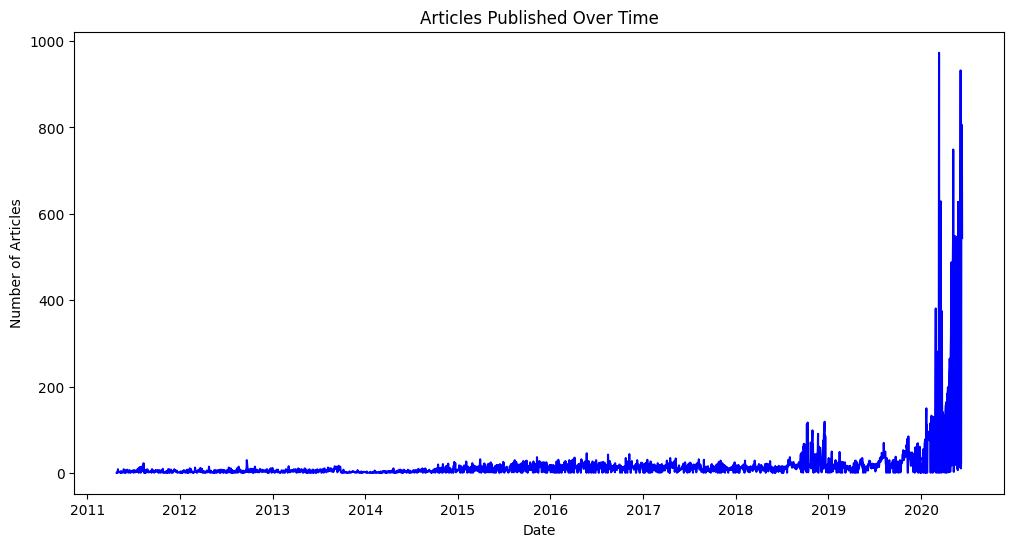

In [34]:
articles_per_data = data.groupby(data['date'].dt.date).size()

articles_per_data = articles_per_data.plot(figsize=(12,6), title= 'Articles Published Over Time', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

headlines= data['headline'].dropna()
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(headlines)

num_topics = 5
model = KMeans(n_clusters=num_topics, random_state=42)
model.fit(X)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(num_topics):
    print(f"Topic {i+1}:")
    for ind in order_centroids[i, :10]:  # Top 10 terms for each topic
        print(f" {terms[ind]}")
    print("\n")

Topic 1:
 earnings
 shares
 market
 update
 stocks
 buy
 raises
 maintains
 pt
 price


Topic 2:
 vs
 est
 eps
 reports
 sales
 estimate
 q4
 q1
 q2
 q3


Topic 3:
 benzinga
 upgrades
 downgrades
 gainers
 initiations
 premarket
 losers
 volume
 2019
 chatter


Topic 4:
 announces
 initiates
 coverage
 00
 pt
 buy
 rating
 target
 price
 outperform


Topic 5:
 stocks
 52
 week
 moving
 session
 hit
 pre
 highs
 lows
 market




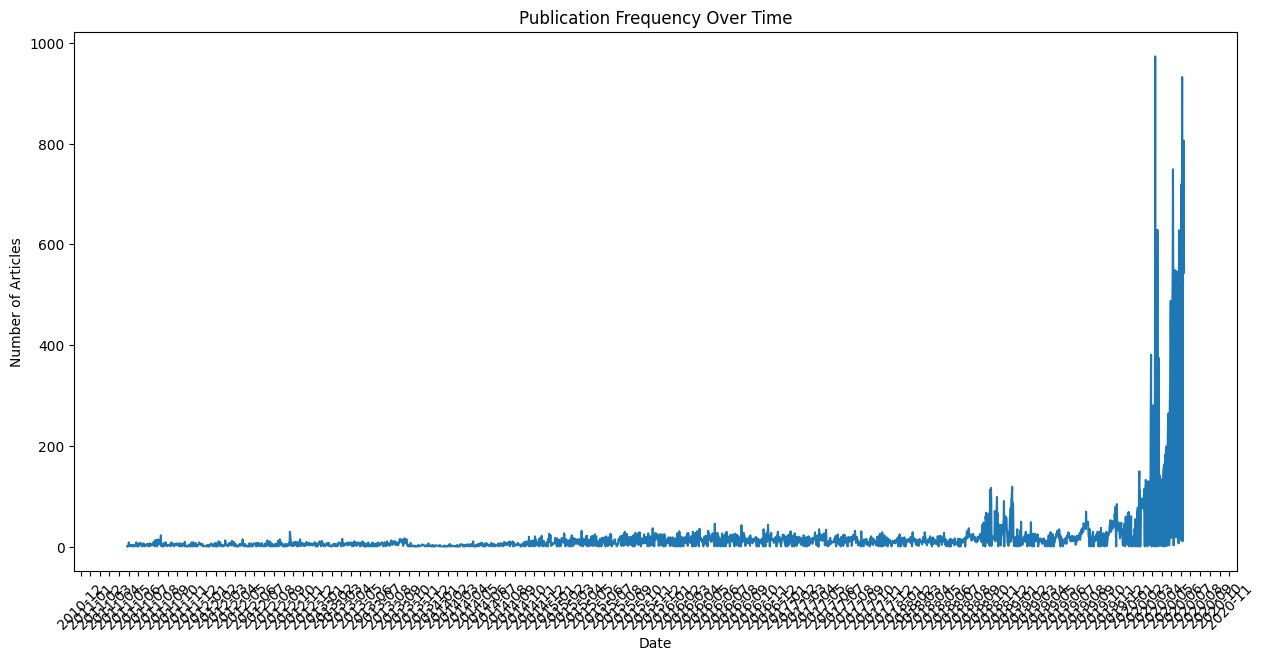

In [41]:
import matplotlib.dates as mdates

# Recreate articles_per_date as a Series
articles_per_date = data.groupby(data['date'].dt.date).size()

plt.figure(figsize=(15,7))
plt.plot(articles_per_date.index, articles_per_date.values)
plt.title("Publication Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.show()

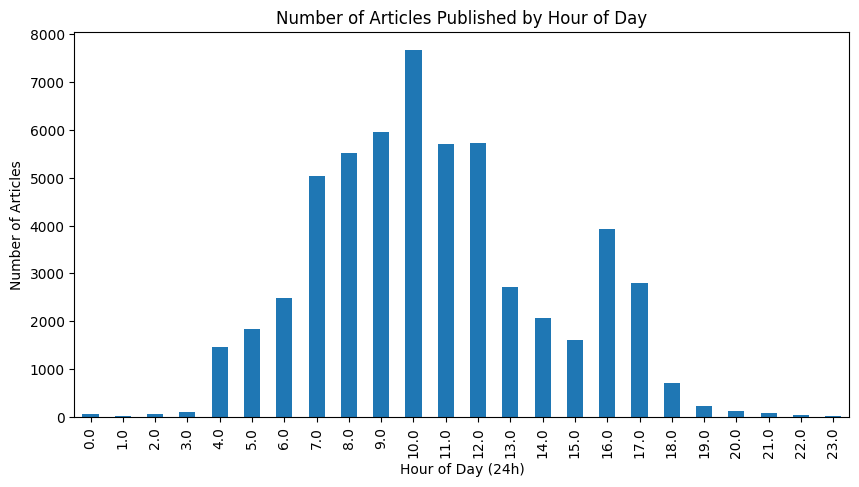

In [42]:
data['hour'] = data['date'].dt.hour
hourly_counts = data['hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
hourly_counts.plot(kind='bar')
plt.title("Number of Articles Published by Hour of Day")
plt.xlabel("Hour of Day (24h)")
plt.ylabel("Number of Articles")
plt.show()


In [ ]:
import re

# Extract domains if publisher contains emails
data['publisher_domain'] = data['publisher'].str.extract(r'@([A-Za-z0-9.-]+)', expand=False)

domain_counts = data['publisher_domain'].value_counts().head(10)
print(domain_counts)
